In [6]:
from numpy.random import choice, normal
import statsmodels.formula.api as smf
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(1234)

# Data simulation

In [2]:
n = 100

distance = choice([0, 0.5, 1], n)
price = 10 - 3*distance + normal(loc=0, scale=.5, size=n)
customers = 30 - 2*price - 10*distance + normal(loc=0, scale=2, size=n)

df = pd.DataFrame({'price': price, 'distance': distance, 'customers': customers})

# Impact of price

Running a linear regression

In [15]:
smf.ols(formula='customers ~ price', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              customers   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     23.16
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           5.41e-06
Time:                        12:26:48   Log-Likelihood:                -236.99
No. Observations:                 100   AIC:                             478.0
Df Residuals:                      98   BIC:                             483.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6948      1.818     -0.382      0.703      -4.302       2.912
price          1.0036      0.209      4.812      0.000       0.590       1.417
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.262
Skew:                           0.089   Prob(JB):                        0.877
Kurtosis:                       2.822   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the coefficient of the price is positive, which shouldn't be like this (we know for sure that it should be -2)

If we plot the data, we see that there is a positive trend of the price into the number of customers, so it is not a problem of the linear regression.

<AxesSubplot:xlabel='price', ylabel='customers'>

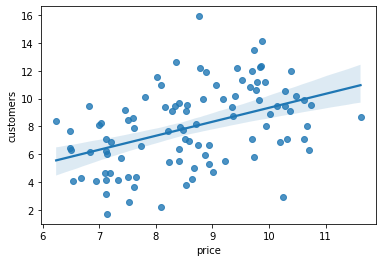

In [4]:
sns.regplot(x = 'price', y = 'customers', data=df)

If we plot the data including the distance we can see that the distance is acting as a confounder

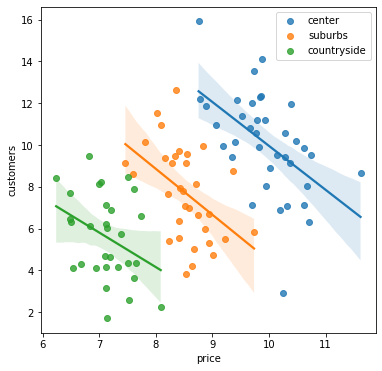

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))

df_0 = df[df['distance'] == 0.0]
df_05 = df[df['distance'] == 0.5]
df_1 = df[df['distance'] == 1.0]

sns.regplot(x = 'price', y = 'customers', data=df_0, ax=ax, label='center')
sns.regplot(x = 'price', y = 'customers', data=df_05, ax=ax, label='suburbs')
sns.regplot(x = 'price', y = 'customers', data=df_1, ax=ax, label='countryside')
ax.legend()
plt.show()

Now we include the distance into the regression and we see that the coefficient of price is close to the real coefficient.

In [ ]:
smf.ols(formula='customers ~ price + distance', data=df).fit().summary()

## Impact of distance

When we are interested in measuring the total effect, since the distance has no confounders, we can directly run the regression

In [16]:
smf.ols(formula='customers ~ distance', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              customers   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     66.69
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.12e-12
Time:                        12:27:51   Log-Likelihood:                -221.65
No. Observations:                 100   AIC:                             447.3
Df Residuals:                      98   BIC:                             452.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0501      0.340     29.547      0.000       9.375      10.725
distance      -4.4912      0.550     -8.166      0.000      -5.583      -3.400
==============================================================================
Omnibus:                        0.611   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.310
Skew:                          -0.123   Prob(JB):                        0.856
Kurtosis:                       3.120   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Obtaining a coefficient of the distance that is close to the -4 that it is expected to be.